## Simulating Stock Market Price Movements

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG'
data = pd.DataFrame()

data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())    # an alternative way of calculating log returns

In [7]:
log_returns.tail(5)

,PG
Date,
2020-04-20,-0.033351
2020-04-21,-0.007658
2020-04-22,-0.002342
2020-04-23,0.006647
2020-04-24,-0.005206


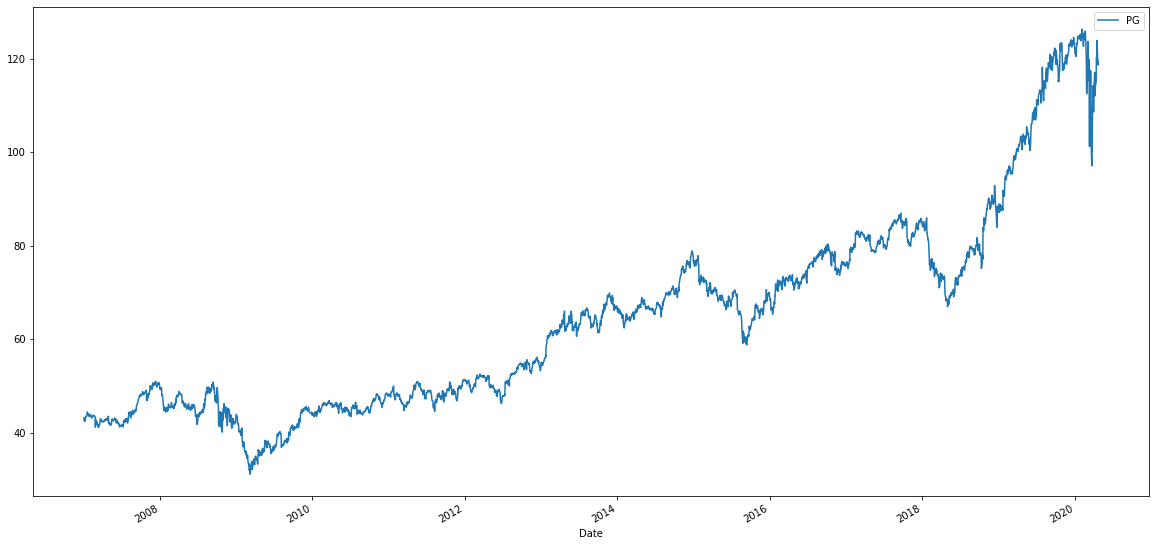

In [10]:
data.plot(figsize=(20, 10))        
# the stock price

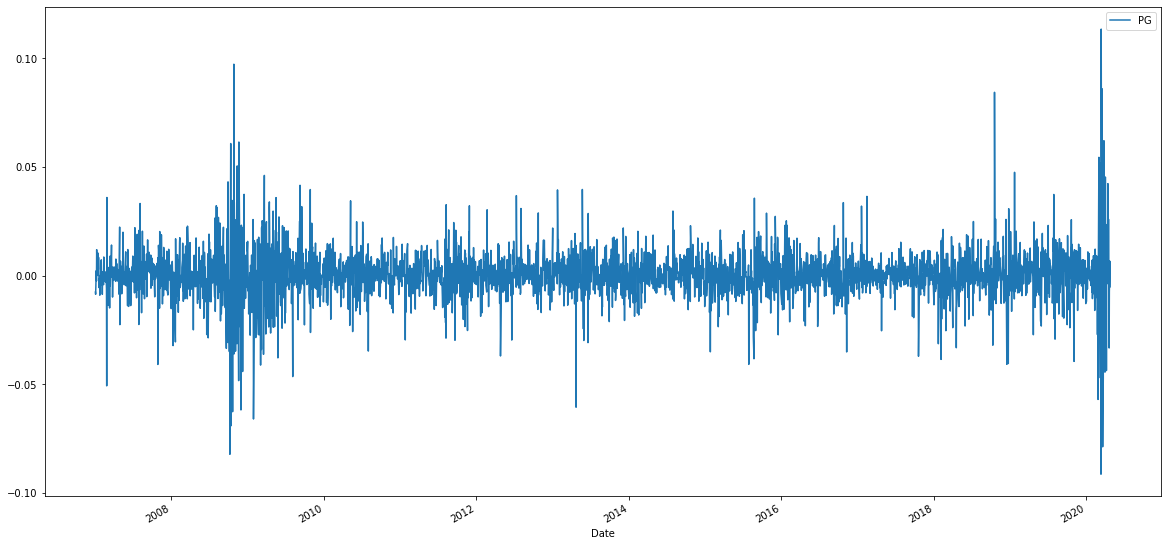

In [11]:
log_returns.plot(figsize=(20, 10))
#returns 

In [12]:
u = log_returns.mean()

u

PG    0.000302
dtype: float64

In [15]:
var = log_returns.var()

var

PG    0.000143
dtype: float64

#### Calculating the drift

In [19]:
drift = u - (0.5*var)

drift

PG    0.000231
dtype: float64

In [20]:
stdev = log_returns.std()

stdev

PG    0.01195
dtype: float64

In [23]:
type(stdev)

pandas.core.series.Series

In [25]:
type(drift)

pandas.core.series.Series

In [28]:
np.array(drift)

array([0.00023088])

In [27]:
np.array(stdev)

array([0.0119503])

In [33]:
norm.ppf(0.95)

1.6448536269514722

In [34]:
x = np.random.rand(10, 2)

x

array([[0.52755192, 0.27045303],
       [0.32842744, 0.04465977],
       [0.88431921, 0.30789978],
       [0.52492005, 0.10470692],
       [0.074017  , 0.75165052],
       [0.03334889, 0.55185503],
       [0.8321873 , 0.86288404],
       [0.12113073, 0.67834709],
       [0.58501685, 0.10121513],
       [0.11679373, 0.76103324]])

In [35]:
norm.ppf(x)

array([[ 0.06911741, -0.61144344],
       [-0.44425965, -1.69899807],
       [ 1.19685883, -0.50181231],
       [ 0.06250597, -1.25517883],
       [-1.44651074,  0.67969286],
       [-1.83370508,  0.13034947],
       [ 0.96284483,  1.09336876],
       [-1.16935295,  0.46308169],
       [ 0.21474479, -1.27465816],
       [-1.19116846,  0.70963014]])

In [40]:
z = norm.ppf(np.random.rand(10, 2))

z

array([[ 1.70575227,  1.07830919],
       [ 0.86059586, -0.66575314],
       [-0.99570272, -0.74575438],
       [ 0.17322168, -1.35435951],
       [-0.98422154, -0.54673496],
       [-0.80793856,  0.76931784],
       [ 1.58308136, -0.99762398],
       [-1.7433331 ,  0.3033201 ],
       [-0.29162914,  0.5543943 ],
       [-1.03933368, -0.37214107]])

In [44]:
t_interval = 1000
iterations = 10

In [48]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_interval, iterations)))



daily_returns

array([[1.0226186 , 0.99412959, 1.00927157, ..., 1.00271992, 0.99566514,
        0.98588863],
       [0.99902563, 1.03307615, 0.98474784, ..., 0.99295745, 1.00600633,
        0.9953238 ],
       [0.99272877, 1.00035502, 1.00281747, ..., 0.99545327, 1.00193922,
        1.00841093],
       ...,
       [1.02285427, 0.98720039, 0.99451959, ..., 0.99990634, 1.01115623,
        1.00364049],
       [0.98866943, 0.9929481 , 1.02568908, ..., 0.99921101, 1.00345668,
        1.01894107],
       [0.99646774, 0.99853827, 1.00159564, ..., 1.01711208, 1.0015919 ,
        1.00728246]])

In [49]:
s0 = data.iloc[-1]

s0

PG    118.779999
Name: 2020-04-24 00:00:00, dtype: float64

In [51]:
price_list = np.zeros_like(daily_returns)

price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
price_list[0] = s0


price_list

array([[118.77999878, 118.77999878, 118.77999878, ..., 118.77999878,
        118.77999878, 118.77999878],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [58]:
for t in range(1, t_interval):
    price_list[t] = price_list[t-1]*daily_returns[t]
    
price_list

array([[118.77999878, 118.77999878, 118.77999878, ..., 118.77999878,
        118.77999878, 118.77999878],
       [118.66426315, 122.70878371, 116.96834765, ..., 117.94348508,
        119.4934312 , 118.22455951],
       [117.80142785, 122.75234824, 117.29790199, ..., 117.4072274 ,
        119.72515571, 119.21893811],
       ...,
       [159.96543049, 191.37723123, 160.93267973, ..., 178.41059211,
        109.85876871,  72.60916928],
       [158.15293072, 190.02765784, 165.06689211, ..., 178.26982866,
        110.23851507,  73.98446469],
       [157.59429368, 189.74988813, 165.33027924, ..., 181.32039603,
        110.41400413,  74.52325335]])

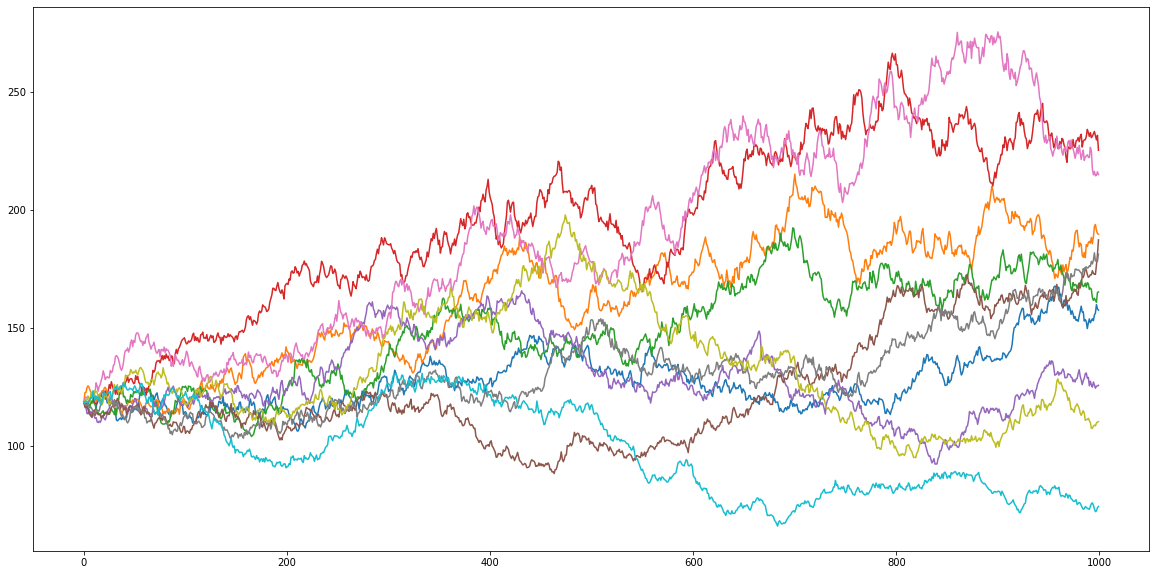

In [59]:
plt.figure(figsize=(20, 10))

plt.plot(price_list);